In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib notebook

In [3]:
def choropleth(fp = "UK_DISTRICTS_COUNTIES_CENSUS2011.shp", df = pd.DataFrame(),severity = "Minor"):
    map_df = gpd.read_file(fp)
#     map_df.plot(label = "UK map")
    map_df.to_csv("orig_map_data.csv")
    data_for_map = df
    merged = map_df.set_index('LAD11CD').join(data_for_map.set_index('Local_Authority_(Highway)'))
    merged = merged.fillna(1)
    # set a variable that will call whatever column we want to visualise on the map
    variable = 'count'
    # set the range for the choropleth
#     print(min(merged['count']),max(merged['count']))
    vmin, vmax = min(merged['count']),max(merged['count'])
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 8))
    # create map
    plt.title("Accident_Severity "+severity+" across UK geolocations")
    merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8',legend = True)
    merged.to_csv("merged_data.csv") #plotted data can be seen in this folder

In [4]:
################### debug data ######################3
# fp = "UK_DISTRICTS_COUNTIES_CENSUS2011.shp"
# map_df = gpd.read_file(fp)
# # check data type so we can see that this is not a normal dataframe, but a GEOdataframe
# map_df.head()

In [5]:
# map_df.plot()
# map_df.to_csv("map_data.csv")

In [7]:
df = pd.read_csv("UK_Accident.csv", header=0)
df.head()

,S No,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [19]:
df2 = df.groupby(['Accident_Severity','Local_Authority_(Highway)']).size().reset_index(name='count') 

In [20]:
print(df2)
df2.to_csv("check.csv")

     Accident_Severity Local_Authority_(Highway)  count
0                    1                 E06000001     14
1                    1                 E06000002     14
2                    1                 E06000003     22
3                    1                 E06000004     27
4                    1                 E06000005     19
..                 ...                       ...    ...
614                  3                 W06000020    607
615                  3                 W06000021    781
616                  3                 W06000022   1723
617                  3                 W06000023   2149
618                  3                 W06000024    670

[619 rows x 3 columns]


In [21]:
df3 = df2[df2['Accident_Severity'] == 1] #aggregating only Critical accident records

In [23]:
df4 = df2[df2['Accident_Severity'] == 2]#aggregating only Major accident records

In [24]:
df5 = df2[df2['Accident_Severity'] == 3]#aggregating only Minor accident records

<IPython.core.display.Javascript object>


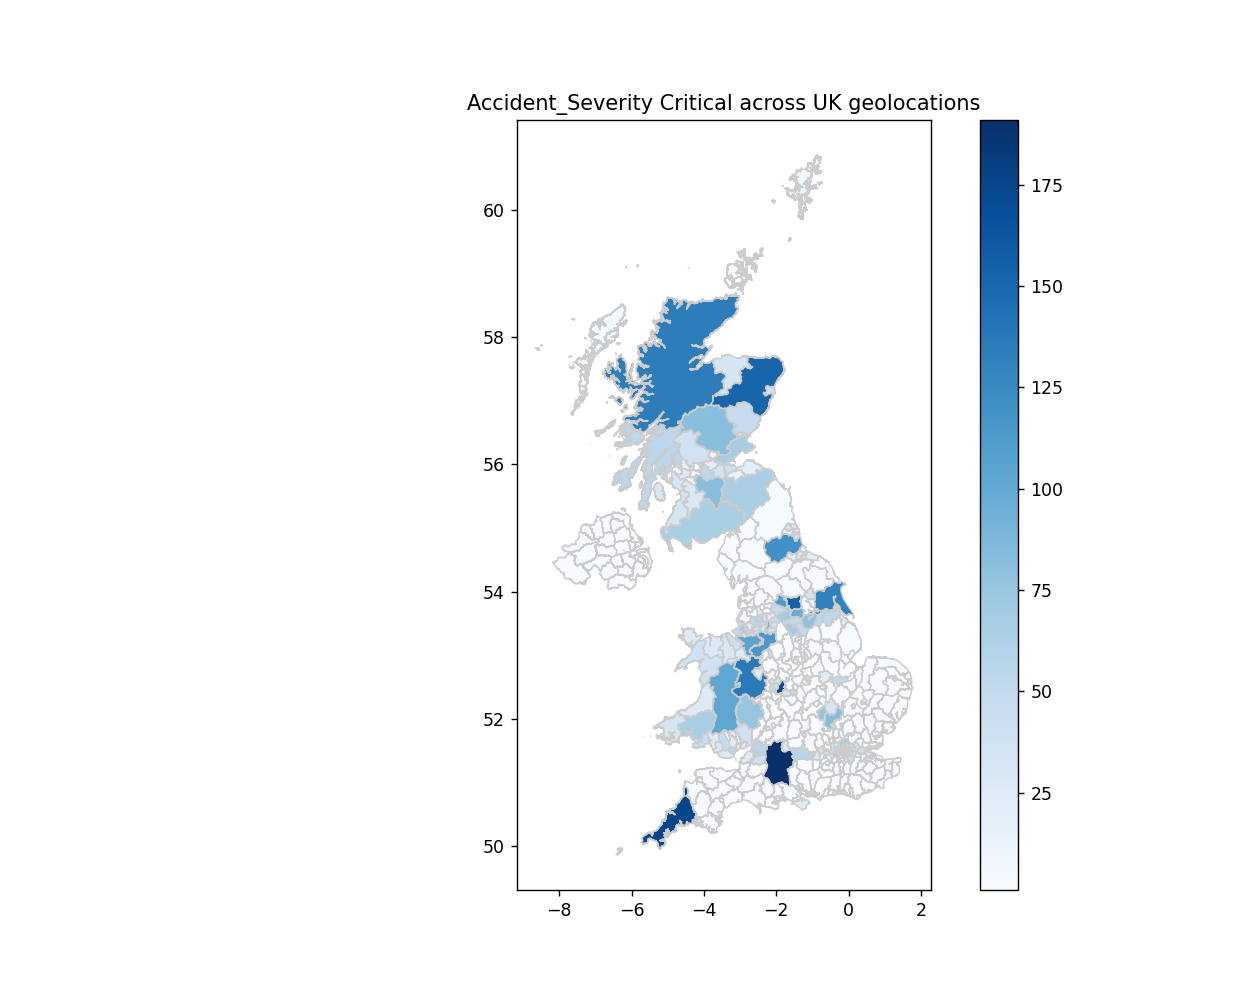

In [27]:
choropleth(df = df3,severity = "Critical")

<IPython.core.display.Javascript object>


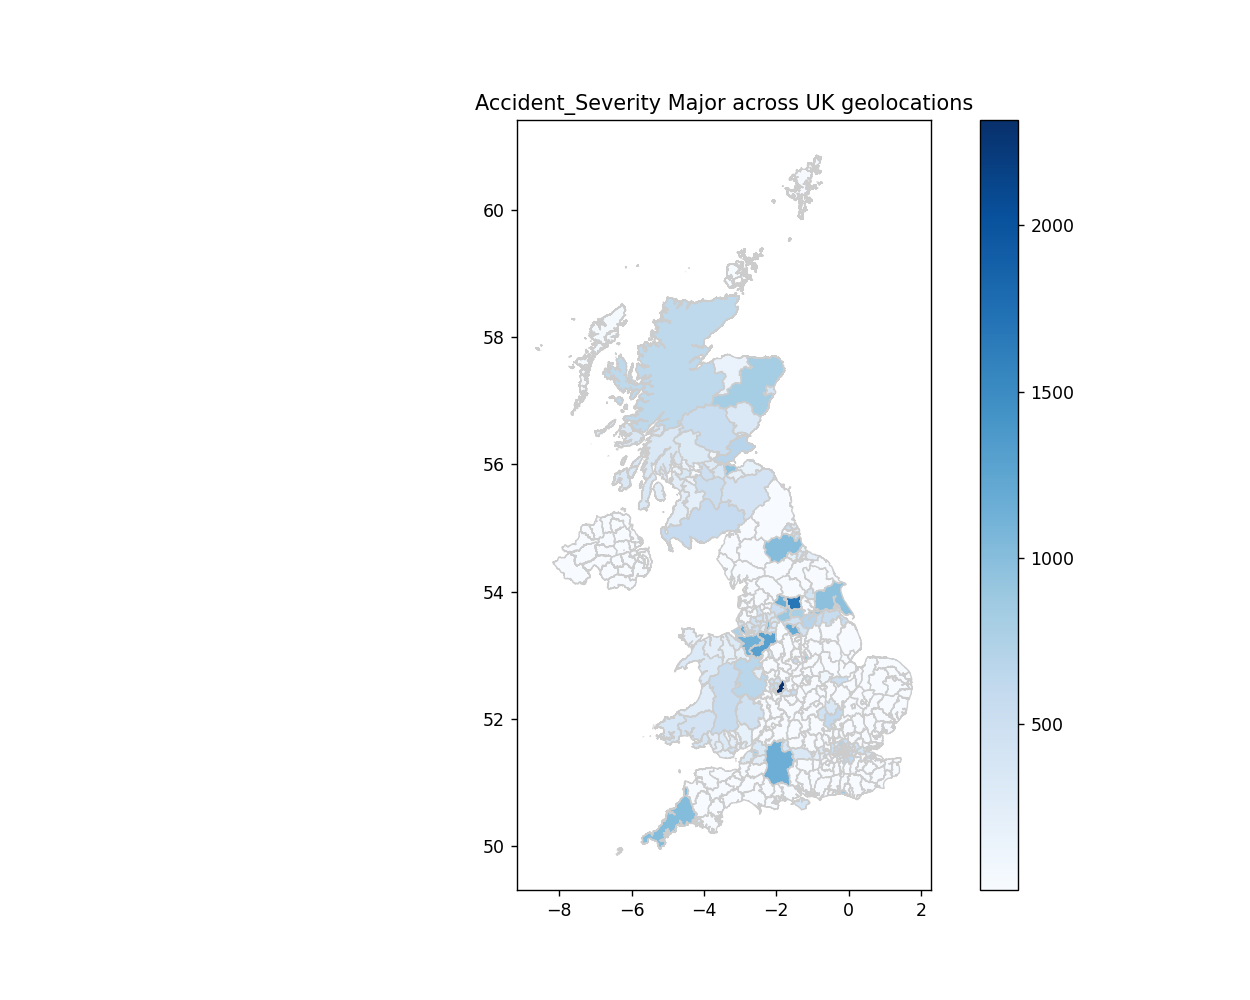

In [26]:
choropleth(df = df4,severity = "Major")

<IPython.core.display.Javascript object>


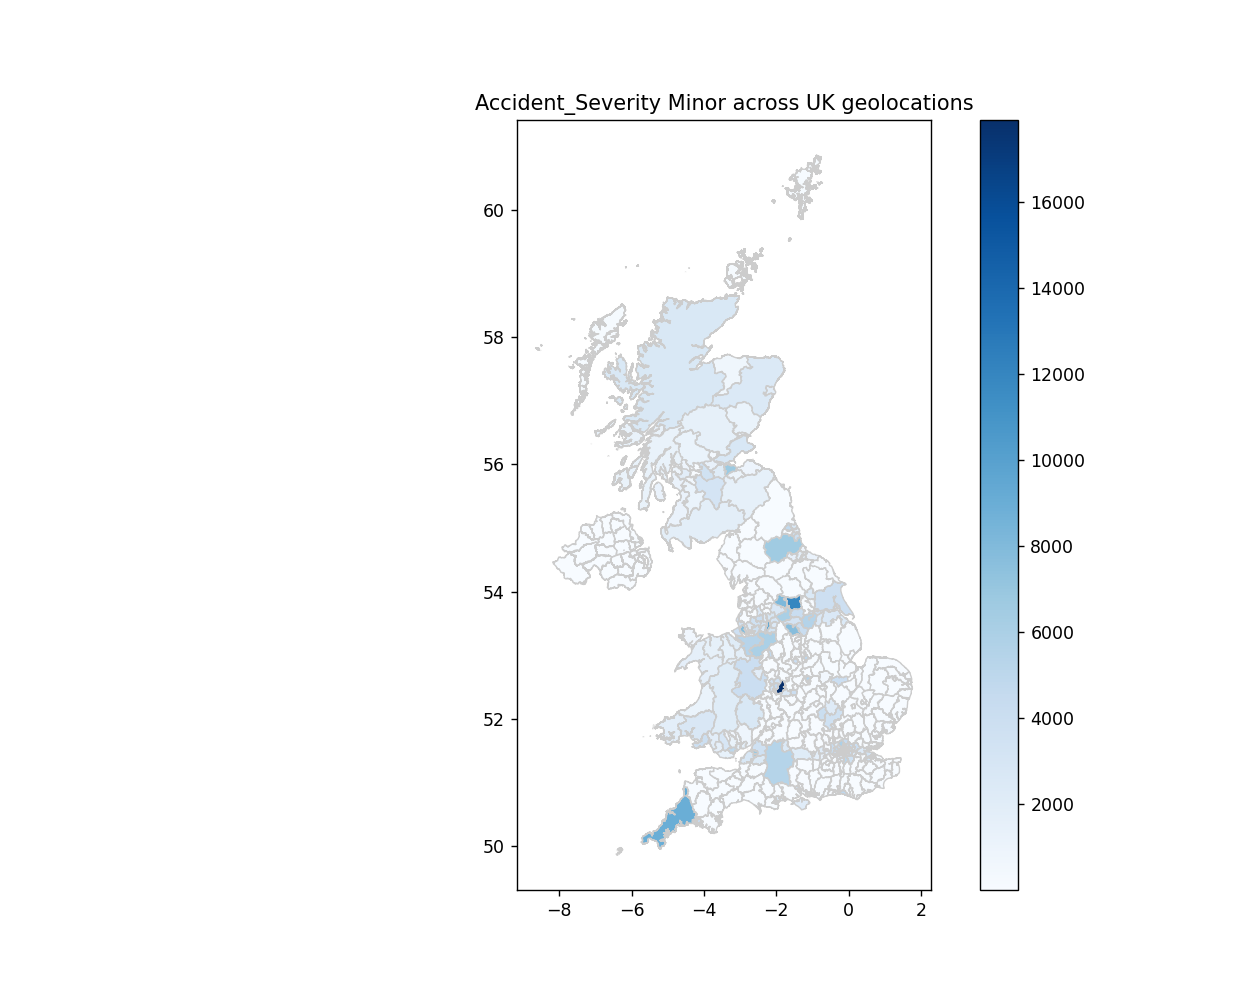

In [28]:
choropleth(df = df5,severity = "Minor")

In [29]:
df['Road_Surface_Conditions'].unique()

array(['Wet/Damp', 'Dry', 'Frost/Ice', 'Snow',
       'Flood (Over 3cm of water)', 'Normal'], dtype=object)

In [30]:
df['Speed_limit'].unique()

#Average is 38.125

array([30, 40, 50, 20, 60, 70, 10, 15], dtype=int64)

In [34]:
df10 = df.groupby(['Accident_Severity','Local_Authority_(Highway)','Speed_limit','Road_Surface_Conditions']).size().reset_index(name='count') 

In [35]:
df11 = df10[df10['Accident_Severity'] == 1] #aggregating only Critical accident records

In [36]:
df6 = df11[df11['Speed_limit'] > 30]

<IPython.core.display.Javascript object>


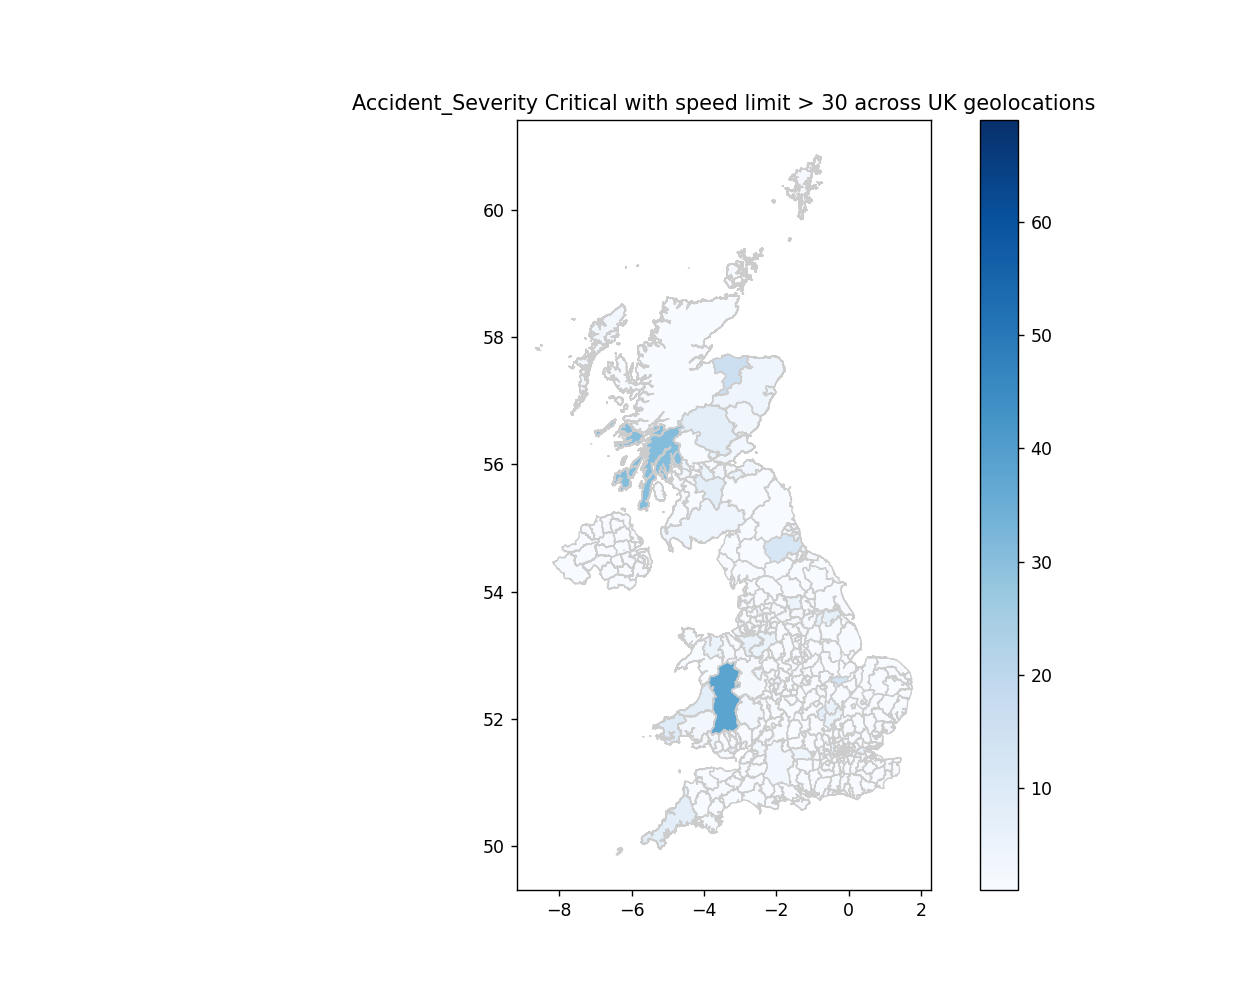

In [37]:
choropleth(df = df6,severity = "Critical with speed limit > 30")

In [38]:
df7 = df11[df11['Speed_limit'] <= 30]

<IPython.core.display.Javascript object>


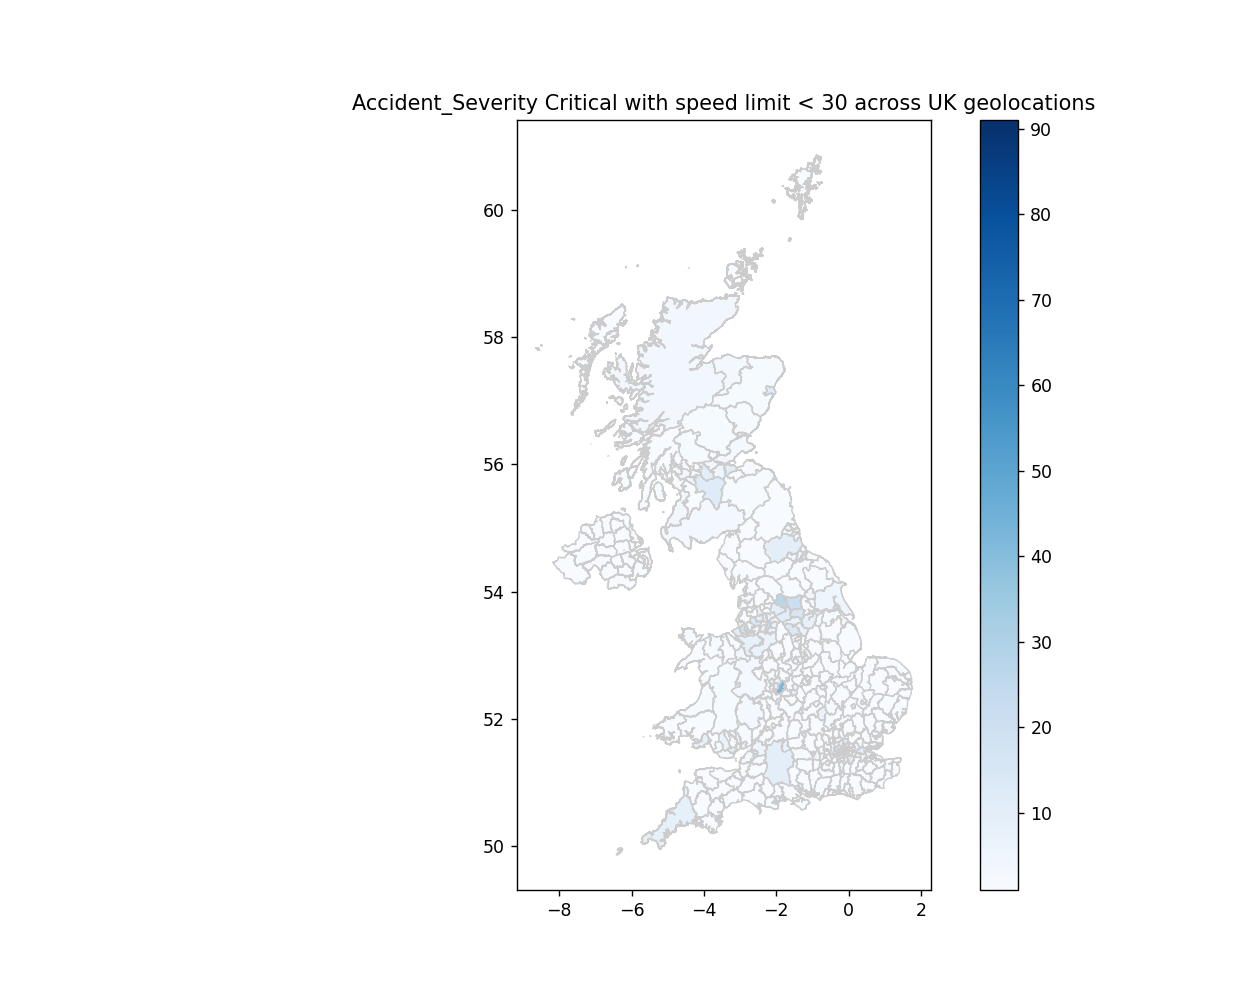

In [39]:
choropleth(df = df7,severity = "Critical with speed limit < 30")

In [40]:
df8 = df11[df11['Road_Surface_Conditions'] != "Normal"]

<IPython.core.display.Javascript object>


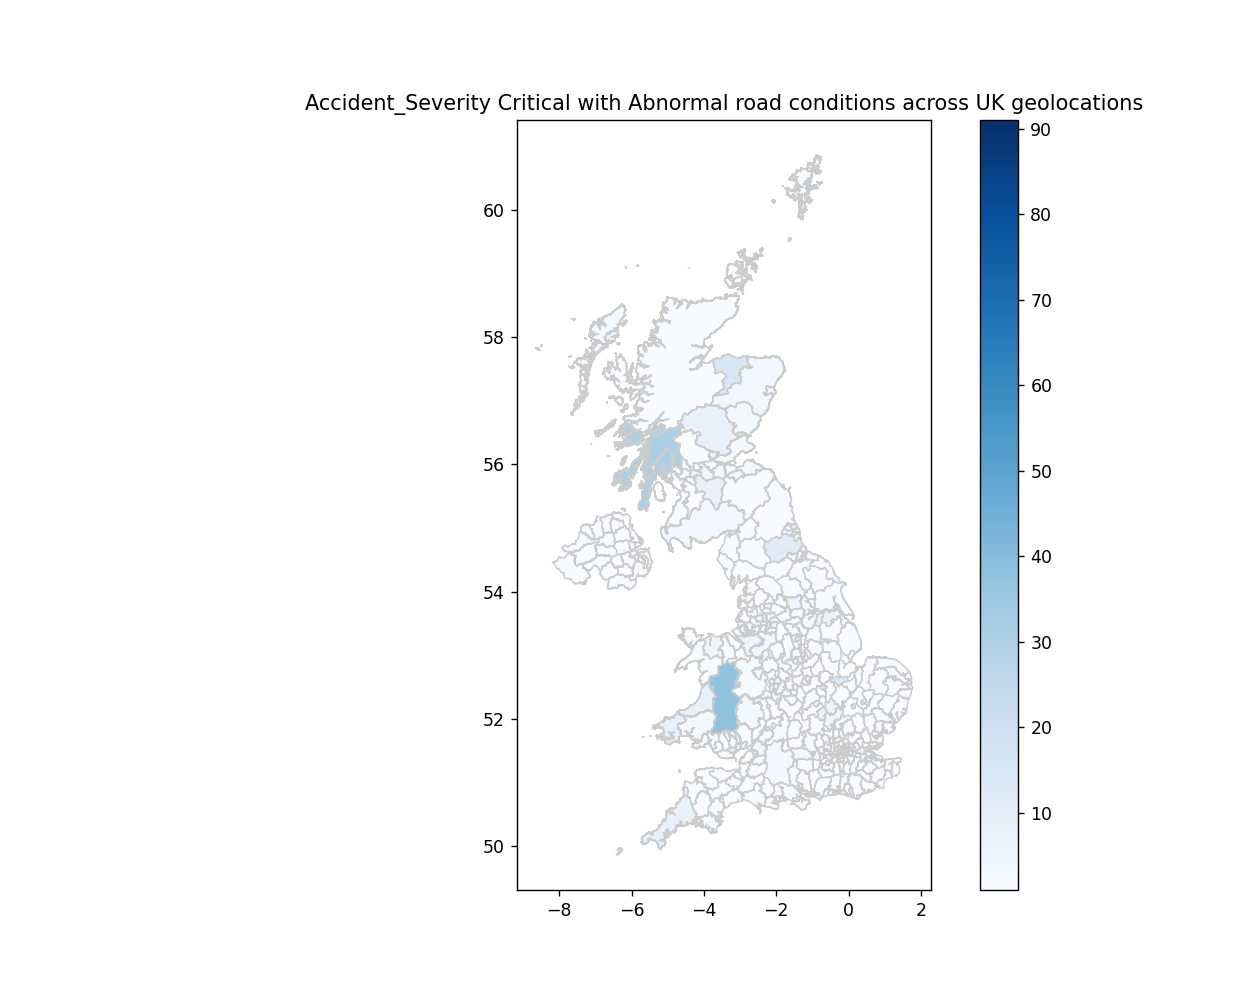

In [41]:
choropleth(df = df8,severity = "Critical with Abnormal road conditions")

In [42]:
df9 = df11[df11['Road_Surface_Conditions'] == "Normal"]

<IPython.core.display.Javascript object>


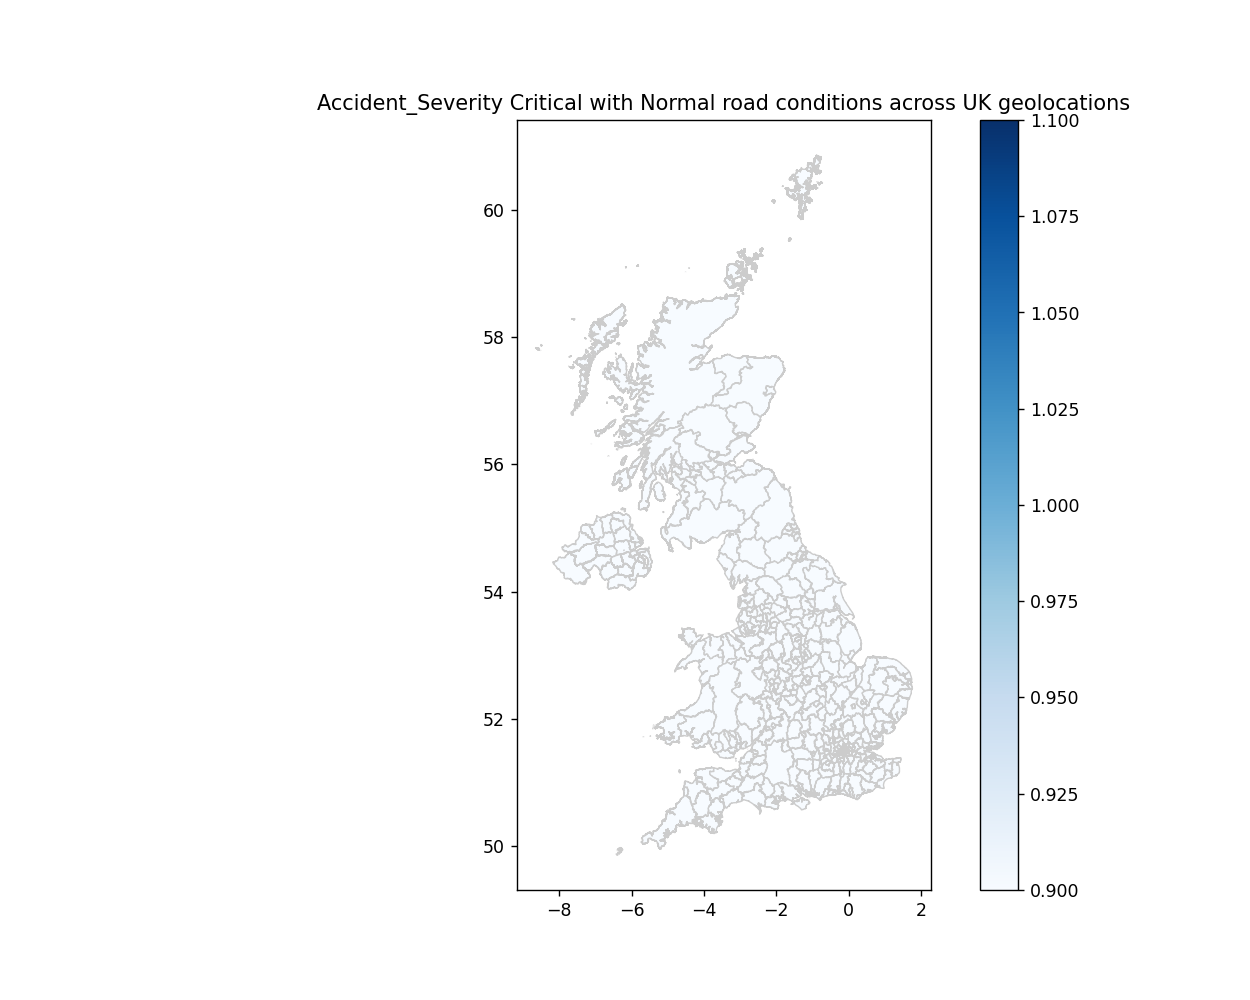

In [43]:
choropleth(df = df9,severity = "Critical with Normal road conditions")